# CSC 4466 Computer Vision
## Lab 2 - Snow
### 2/2/2022
### *** Sam Bacon ***
The goal of this lab is to get comfortable working with images in Python. You will start with a partially complete Python script and add code to make it work. Look for TODO's in the comments to see where code should be added.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## The make_it_snow function is where the magic happens.
See comments in the function for what needs to be completed.

In [56]:
def make_it_snow(img, color, flake_size, color_by_position):
    ''' (Note triple quotes for multi-line comment)
        Add random "snow" to an image.

        Parameters:
        img: the image to display
        color: the color of the snow as a 3-element list of numbers (BGR).
               If the color is [0, 0, 0], then the snow will be randomly colored.

        Returns:
        img: the modified input image
    '''
    print('Starting make_it_snow function with color', color)

    if img is None:
        print(' *** It appears that no image has been provided.')
    
    if color is None:
        print(' *** It appears that no color has been provided.')
    
    # This constant controls how many snowflakes get drawn on the image.
    MAX_SNOWFLAKES = 1500

    if color == [0, 0, 0]:
        use_random_color = True
    else:
        use_random_color = False

    # TODO: determine the number of rows and columns in the image
    if len(img.shape) == 2:
      print('Grayscale image')
      h, w = img.shape
      ch = 1

    else:
      print('Color image')
      h, w, ch = img.shape

    print(f'Image shape is {h} pixels high by {w} pixels wide. There are {ch} channels.')
    print(f'Color by position:', color_by_position)
  
    # This loop draws the number of snowflakes given by MAX_SNOWFLAKES
    for i in range(MAX_SNOWFLAKES):
        # TODO: find a random pixel within the image.
        # Hint: use np.random.randint to pick a random row between 0 and the number
        # of rows in the image. Use np.random.randint again to pick a column.
        rand_row = np.random.randint(0, h)
        rand_col = np.random.randint(0, w)

        if color_by_position:
          color = (255-rand_row, 255-rand_row, 255-rand_row/4)

        elif use_random_color:
          # TODO: generate a random color (use np.random.randint for the
          # blue, green, and red). Remember that these values should be between
          # 0 and 255.
          color = np.random.randint(low=0, high=256, size=3, dtype=np.uint8)

        # TODO: set the color of the random pixel in the image
        img[int(rand_row-(flake_size/2)):int(rand_row+(flake_size/2)), int(rand_col-(flake_size/2)):int(rand_col+(flake_size/2))] = color

    # pass back the snowy image
    return img


## Testing
Find an image online, download it to your computer, then upload it to
Colab so it will be in the same folder with this script.

Image read with shape (rows, columns, color channels): (168, 300, 3)
Starting make_it_snow function with color [255, 255, 255]
Color image
Image shape is 84 pixels high by 150 pixels wide. There are 3 channels.
Color by position: True


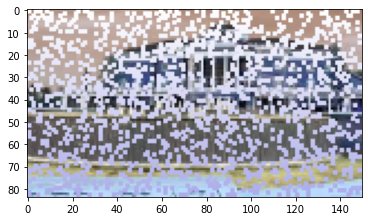

In [58]:
# TODO: update the variable below to match the image file name that you uploaded.
image_name = 'my_image.jpg'

# TODO: read in the image into a variable called img
img = cv2.imread(image_name)

if img is None:
  print('Unable to read image. Make sure it exists in the folder with this notebook.')
else:
  print('Image read with shape (rows, columns, color channels):', img.shape)

# TODO: set a snow color. This should be a 3-element list of numbers: [B, G, R].
snow_color = [255,255,255]

# If your image is large, you may not be able to see the individual pixel-sized
# snowflakes, in which case it may be helpful to shrink the image. You can play
# with the following line of code to work for your image, making fx and fy
# smaller to shrink the image more.
img = cv2.resize(img, None, fx=0.5, fy=0.5)

# call make_it_snow with your image
snowy_img = make_it_snow(img, snow_color, 2, True)

# TODO: display the snowy image
plt.imshow(snowy_img)
plt.show()
